In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd




In [7]:
url = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&sort=bestmatch&serveWarrantyCount=true&gaId=444609335.1720011387&listingSource=TabFilter&storeCityId=2378'
headers = {'User-Agent': 'Mozilla/5.0'}

In [8]:
response = requests.get(url, headers=headers)
response.status_code  # Should be 200 if the request was successful


200

In [9]:
soup = BeautifulSoup(response.content, 'html.parser')


In [32]:
car_listings = soup.find_all('h3', class_='_11dVb')



In [33]:
len(car_listings)  # Output the number of car listings found

20

In [34]:
car_listings


[<h3 class="_11dVb">2017 Maruti Swift Dzire ZXI</h3>,
 <h3 class="_11dVb">2014 Maruti Ertiga VXI CNG</h3>,
 <h3 class="_11dVb">2018 Maruti Dzire VXI AMT</h3>,
 <h3 class="_11dVb">2014 Maruti Swift Dzire ZDI</h3>,
 <h3 class="_11dVb">2012 Maruti Wagon R 1.0 VXI</h3>,
 <h3 class="_11dVb">2015 Maruti Wagon R 1.0 LXI CNG</h3>,
 <h3 class="_11dVb">2022 Maruti Ertiga ZXI (O) CNG</h3>,
 <h3 class="_11dVb">2016 Maruti Baleno DELTA DIESEL 1.3</h3>,
 <h3 class="_11dVb">2016 Maruti Celerio ZXI AMT</h3>,
 <h3 class="_11dVb">2017 Maruti Baleno ZETA PETROL 1.2</h3>,
 <h3 class="_11dVb">2016 Maruti Baleno DELTA PETROL 1.2</h3>,
 <h3 class="_11dVb">2016 Maruti Baleno DELTA PETROL 1.2</h3>,
 <h3 class="_11dVb">2017 Maruti Celerio VXI CNG</h3>,
 <h3 class="_11dVb">2017 Maruti Wagon R 1.0 LXI CNG</h3>,
 <h3 class="_11dVb">2013 Maruti Ertiga VXI</h3>,
 <h3 class="_11dVb">2021 Maruti Ciaz DELTA 1.5 SHVS MT PETROL</h3>,
 <h3 class="_11dVb">2016 Maruti Vitara Brezza ZDI PLUS DUAL TONE</h3>,
 <h3 class="_11dV

In [35]:
def get_details(soup):
    name_elements = soup.find_all('h3', {'class': '_11dVb'})
    transmission_elements = soup.find_all('ul', {'class': '_3J2G-'})
    km_elements = soup.find_all('ul', {'class': '_3J2G-'})
    price_elements = soup.find_all('div', {'class': '_2KyOK'})
    
    # creating empty lists
    year = []
    make = []
    model = []
    transmissions = []
    kilometers_driven = []
    fuel = []
    prices = []
    
    for elem in name_elements:
        text = elem.get_text()
        year.append(int(text[:4]))
        make.append(text.split(" ")[1])
        model.append(" ".join(text.split(" ")[2:]))
        
    for ul in transmission_elements:
        transmissions.append(ul.find_all('li')[-1].get_text())
        
    for ul in km_elements:
        km_text = ul.find_all('li')[0].get_text()[:-3].replace(',', '')
        kilometers_driven.append(int(km_text))
        fuel.append(ul.find_all('li')[2].get_text())
        
    for div in price_elements:
        price_text = div.find_all('strong')[0].get_text()[1:].replace(',', '')
        if 'Lakh' in price_text:
            price_value = float(price_text.replace(' Lakh', '')) * 100000
        else:
            price_value = float(price_text)
        prices.append(int(price_value))
        
    return year, make, model, transmissions, kilometers_driven, fuel, prices


In [36]:
year, make, model, transmissions, kilometers_driven, fuel, prices = get_details(soup)

# Verify the lengths of the lists are consistent
print(len(year), len(make), len(model), len(transmissions), len(kilometers_driven), len(fuel), len(prices))


20 20 20 20 20 20 20


In [37]:
# Create DataFrame
df = pd.DataFrame({
    'Year': year,
    'Make': make,
    'Model': model,
    'Transmission': transmissions,
    'Kilometers Driven': kilometers_driven,
    'Fuel Type': fuel,
    'Price': prices
})

# Display DataFrame
df.head()  # Display the first few rows


,Year,Make,Model,Transmission,Kilometers Driven,Fuel Type,Price
0,2017,Maruti,Swift Dzire ZXI,Manual,36953,Petrol,490000
1,2014,Maruti,Ertiga VXI CNG,Manual,70348,CNG,620000
2,2018,Maruti,Dzire VXI AMT,Automatic,51852,Petrol,574000
3,2014,Maruti,Swift Dzire ZDI,Manual,11144,Diesel,613000
4,2012,Maruti,Wagon R 1.0 VXI,Manual,42425,Petrol,238000


In [38]:
df.to_csv('maruti_suzuki_cars.csv', index=False)
print(f"Scraped data saved to 'maruti_suzuki_cars.csv' with {len(df)} records.")


Scraped data saved to 'maruti_suzuki_cars.csv' with 20 records.


In [39]:
df

,Year,Make,Model,Transmission,Kilometers Driven,Fuel Type,Price
0,2017,Maruti,Swift Dzire ZXI,Manual,36953,Petrol,490000
1,2014,Maruti,Ertiga VXI CNG,Manual,70348,CNG,620000
2,2018,Maruti,Dzire VXI AMT,Automatic,51852,Petrol,574000
3,2014,Maruti,Swift Dzire ZDI,Manual,11144,Diesel,613000
4,2012,Maruti,Wagon R 1.0 VXI,Manual,42425,Petrol,238000
5,2015,Maruti,Wagon R 1.0 LXI CNG,Manual,79837,CNG,364000
6,2022,Maruti,Ertiga ZXI (O) CNG,Manual,20619,CNG,1192000
7,2016,Maruti,Baleno DELTA DIESEL 1.3,Manual,62767,Diesel,557000
8,2016,Maruti,Celerio ZXI AMT,Automatic,76727,Petrol,405000
9,2017,Maruti,Baleno ZETA PETROL 1.2,Manual,40995,Petrol,579000


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Load the CSV file into a DataFrame
df = pd.read_csv('maruti_suzuki_cars.csv')

# Display the first few rows of the DataFrame
df.head()


,Year,Make,Model,Transmission,Kilometers Driven,Fuel Type,Price
0,2017,Maruti,Swift Dzire ZXI,Manual,36953,Petrol,490000
1,2014,Maruti,Ertiga VXI CNG,Manual,70348,CNG,620000
2,2018,Maruti,Dzire VXI AMT,Automatic,51852,Petrol,574000
3,2014,Maruti,Swift Dzire ZDI,Manual,11144,Diesel,613000
4,2012,Maruti,Wagon R 1.0 VXI,Manual,42425,Petrol,238000


In [42]:
# Display basic information about the DataFrame
df.info()

# Summary statistics of the DataFrame
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               20 non-null     int64 
 1   Make               20 non-null     object
 2   Model              20 non-null     object
 3   Transmission       20 non-null     object
 4   Kilometers Driven  20 non-null     int64 
 5   Fuel Type          20 non-null     object
 6   Price              20 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 1.2+ KB


Year                 0
Make                 0
Model                0
Transmission         0
Kilometers Driven    0
Fuel Type            0
Price                0
dtype: int64

In [43]:
# Handle missing values if any
df.dropna(inplace=True)

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

# Display the cleaned DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               20 non-null     int64 
 1   Make               20 non-null     object
 2   Model              20 non-null     object
 3   Transmission       20 non-null     object
 4   Kilometers Driven  20 non-null     int64 
 5   Fuel Type          20 non-null     object
 6   Price              20 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 1.2+ KB


In [44]:
# Handle missing values if any
df.dropna(inplace=True)

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

# Display the cleaned DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               20 non-null     int64 
 1   Make               20 non-null     object
 2   Model              20 non-null     object
 3   Transmission       20 non-null     object
 4   Kilometers Driven  20 non-null     int64 
 5   Fuel Type          20 non-null     object
 6   Price              20 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 1.2+ KB


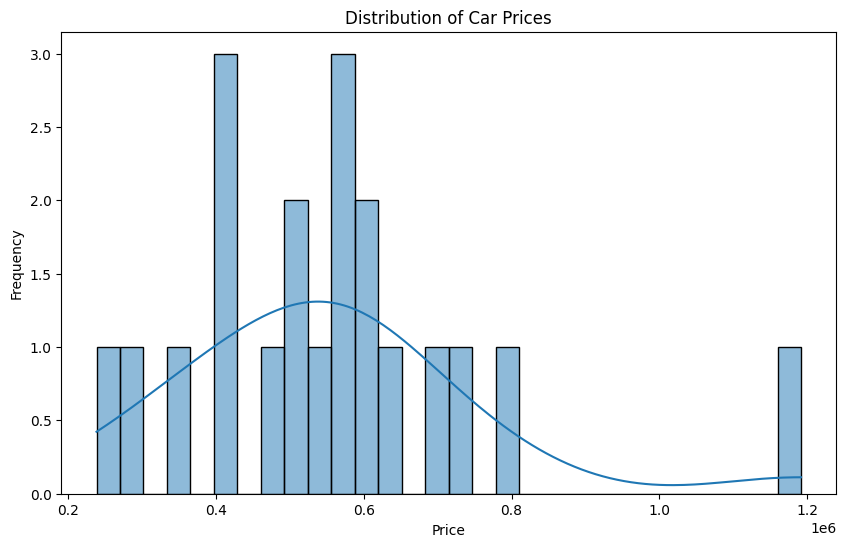

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


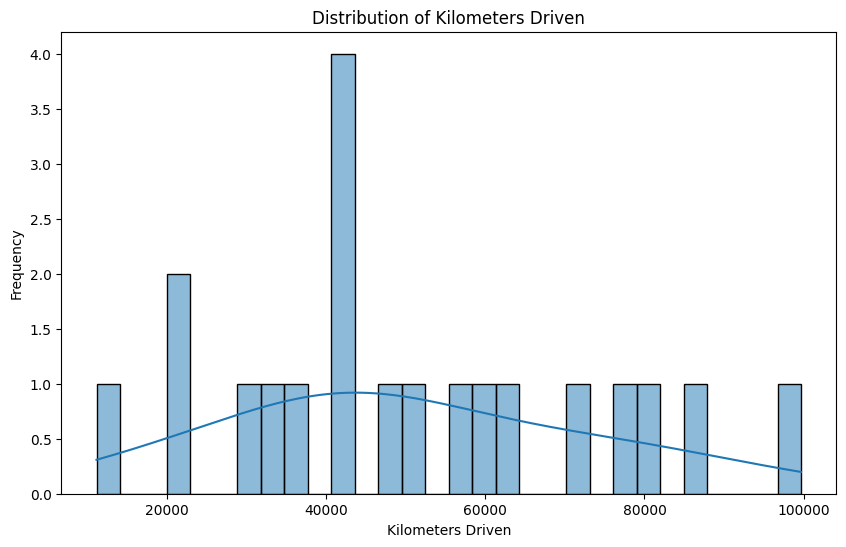

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Kilometers Driven'], bins=30, kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()


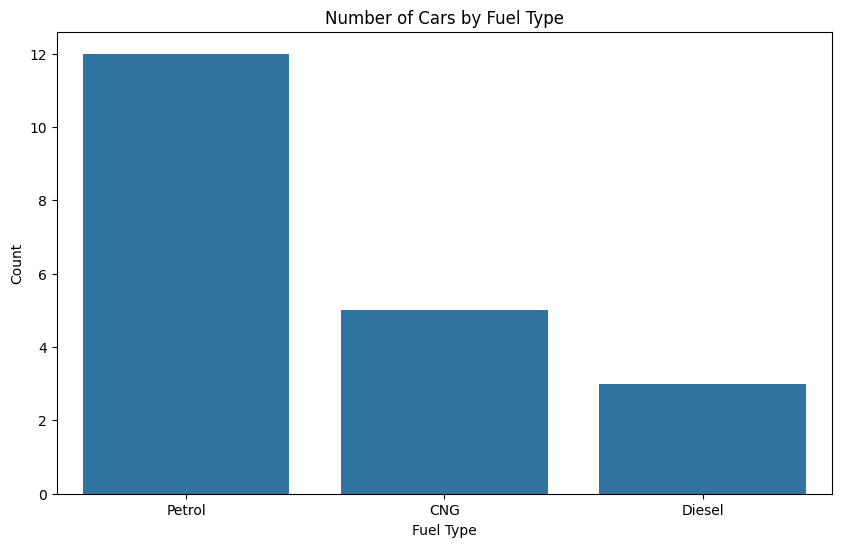

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel Type', data=df)
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


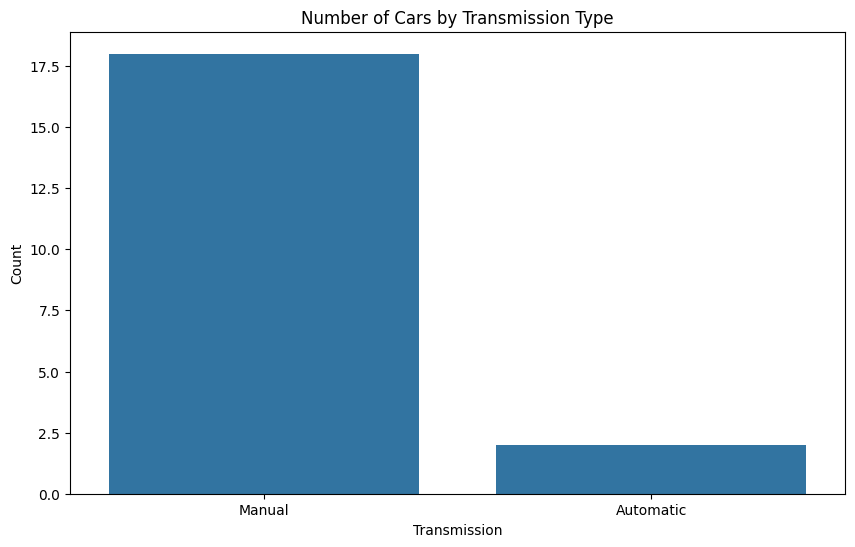

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Number of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()


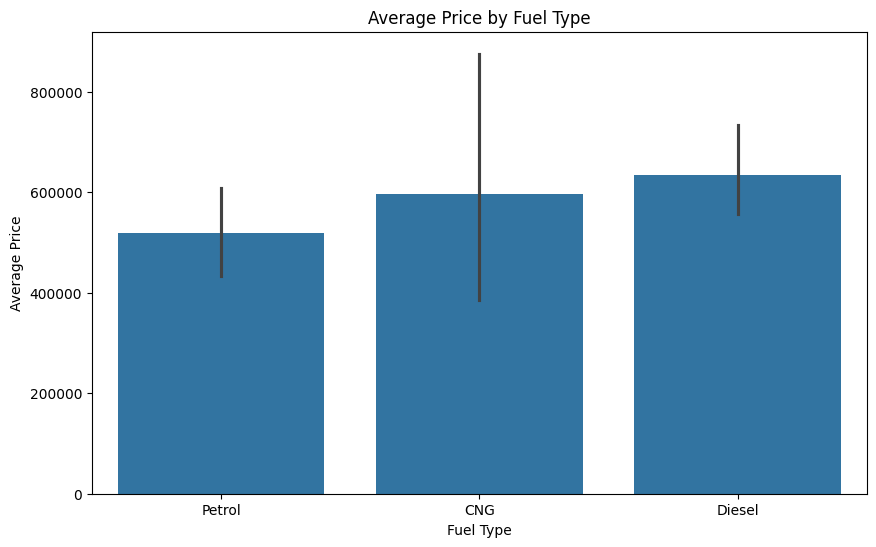

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel Type', y='Price', data=df, estimator='mean')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()


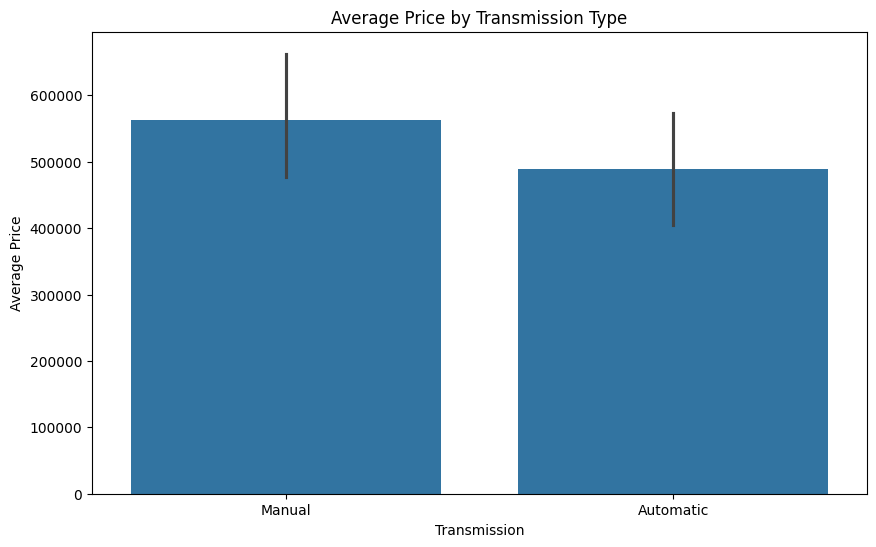

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Transmission', y='Price', data=df, estimator='mean')
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.show()


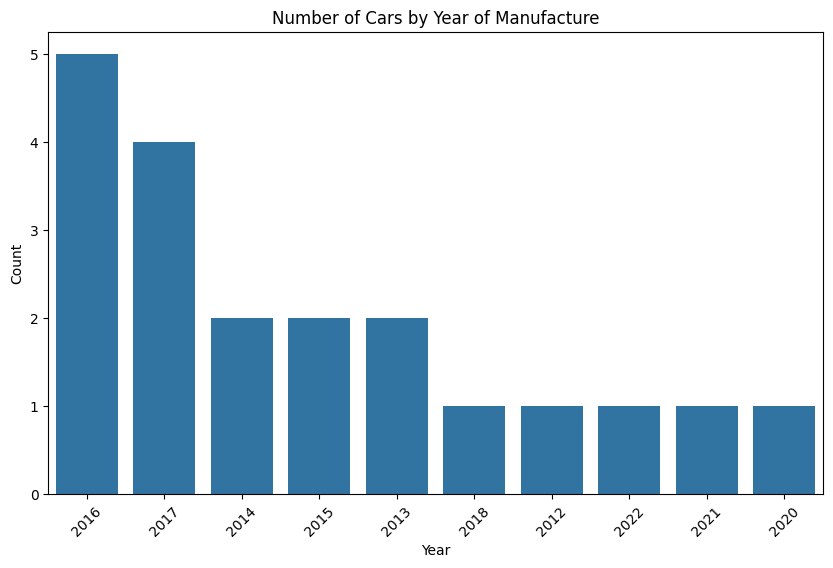

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, order=df['Year'].value_counts().index)
plt.title('Number of Cars by Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
